<a href="https://colab.research.google.com/github/apadkavyrava/Card-default-predition/blob/master/Credit_default_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data and look at it

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Data is full. No need replace or add values.


In [0]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Values 5, 6 and 0 mean 'Unknown', so we can group them and marked as 5

In [0]:
import numpy as np
data['EDUCATION'] = np.where(data['EDUCATION'] == 6, 5, data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 0, 5, data['EDUCATION'])
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4])

In [0]:
data['MARRIAGE'] =np.where(data['MARRIAGE'] ==0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3])

Make simple analytics


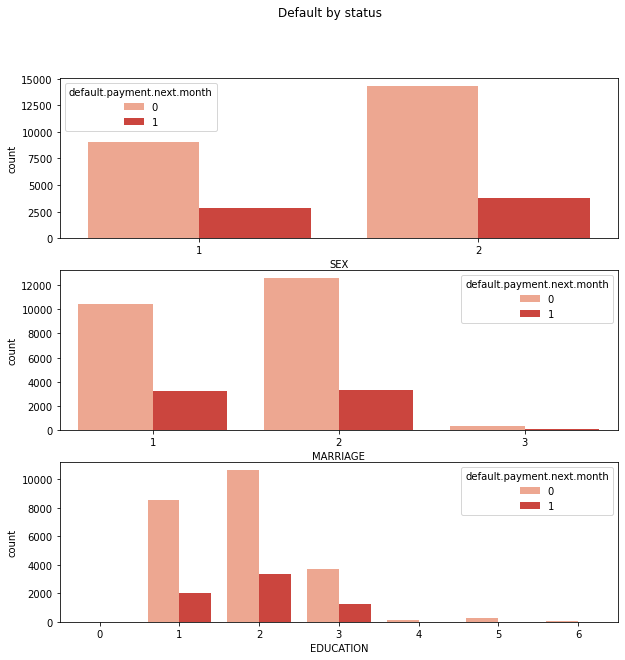

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(3,1, figsize = (10,10), facecolor = "White" )
f.suptitle('Default by status')
sns.countplot(x = "SEX", hue = "default.payment.next.month", data = data, palette = "Reds", ax = axes[0])
ax2 = sns.countplot(x = "MARRIAGE", hue = "default.payment.next.month", data = data, palette = "Reds", ax = axes[1])
ax3 = sns.countplot(x = "EDUCATION", hue = "default.payment.next.month", data=data, palette = "Reds", ax = axes[2])


Explore how many default we have in total


Text(0.5, 1.0, 'Default')

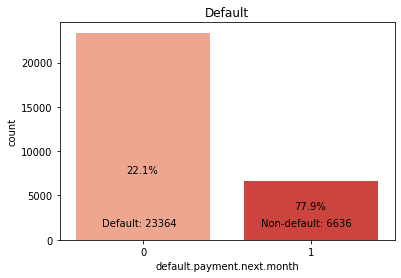

In [0]:
pos = data['default.payment.next.month'].sum()
neg = len(data) - pos

pos_per = round(pos /len(data)*100, 1)
neg_per = round(neg/len(data)*100, 1)
sns.countplot("default.payment.next.month", data = data, palette = "Reds")
plt.annotate('Non-default: {}'.format(pos), xy =(0.7, 1500))
plt.annotate('Default: {}'.format(neg), xy = (-0.25, 1500))
plt.annotate(str(pos_per) + "%", xy = (-0.1, 7500))
plt.annotate(str(neg_per)+"%", xy = (0.9, 3500))
plt.title("Default")

Plot defaults against non-defaults base on card limit

Text(0.5, 0, 'Card limit type')

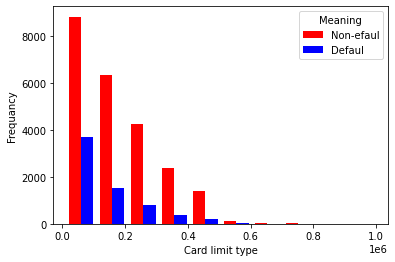

In [0]:
card_pos = np.array(data[data["default.payment.next.month"]==0]["LIMIT_BAL"])
card_neg = np.array(data[data["default.payment.next.month"]==1]["LIMIT_BAL"])

card = plt.hist(x=[card_pos, card_neg], bins = 10, color = ['R', 'B'])
plt.legend(['Non-efaul','Defaul'], title = 'Meaning')
plt.ylabel('Frequancy')
plt.xlabel('Card limit type')

Simple analysis


In [0]:
import statistics as st
print('total clients {}'.format(data['ID'].count()))
print('Average credit card limit {}'.format(round(st.mean(data['LIMIT_BAL']),1)))
print('Standard deviation of limits {}'.format(st.pstdev(round(data['LIMIT_BAL']),1)))
print('Most common status{}'.format(st.median(data['MARRIAGE'])))
print('Most common leven of education {}'.format(st.median(data['EDUCATION'])))
print('Most common gender  {}'.format(st.median(data['SEX']),1))
print('Estimate age {}'.format (st.median(data['AGE']),1))

total clients 30000
Average credit card limit 167484.3
Standard deviation of limits 129745.49908815547
Most common status2.0
Most common leven of education 2.0
Most common gender  2.0
Estimate age 34.0


We can see that our customers are more women and they are more likly default-prone.
Also our customers mostly have University degree and also this group of people has hightest level of default.
Card holders are more single and slightly more likely to default

Now explore default hisory by months


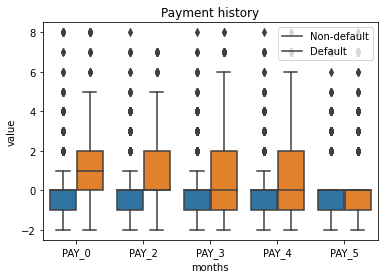

In [0]:
default = "default.payment.next.month"
month_p = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']]
month_p = pd.concat([data[default], month_p], axis = 1)
month_p = pd.melt(month_p, id_vars = default, var_name= "months", value_name = "value")
sns.boxplot(x = "months", y = "value", hue = default, data = month_p)
plt.title("Payment history")
plt.legend(["Non-default","Default"], loc ="upper right")

In [0]:
Have a look to features distribushion.

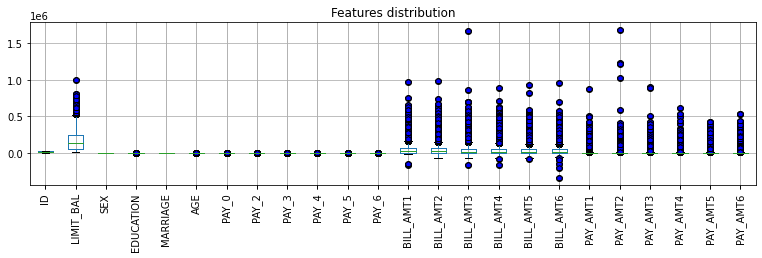

In [0]:
features  = data.drop(default, axis = 1)
plt.figure(figsize = (13,3))
features.boxplot(features.columns.name, rot=90)
plt.title("Features distribution")
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)



As we see we have outliers, so we need normalisation features.


Text(0.5, 1.0, 'Features distr after normalisartion')

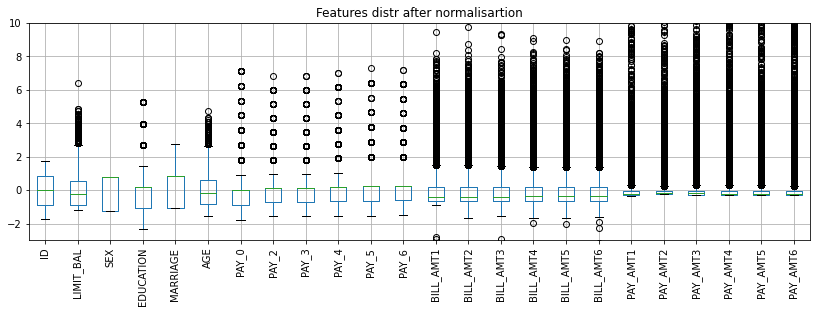

In [0]:
stdX = (features - features.mean()) / (features.std())
plt.figure(figsize = (14,4))
stdX.boxplot(stdX.columns.name, rot = 90)
plt.ylim([-3, 10])
plt.title("Features distr after normalisartion")

make a default -- non-default distr.

Text(0.5, 1.0, 'Features dist after normalisation and split by default')

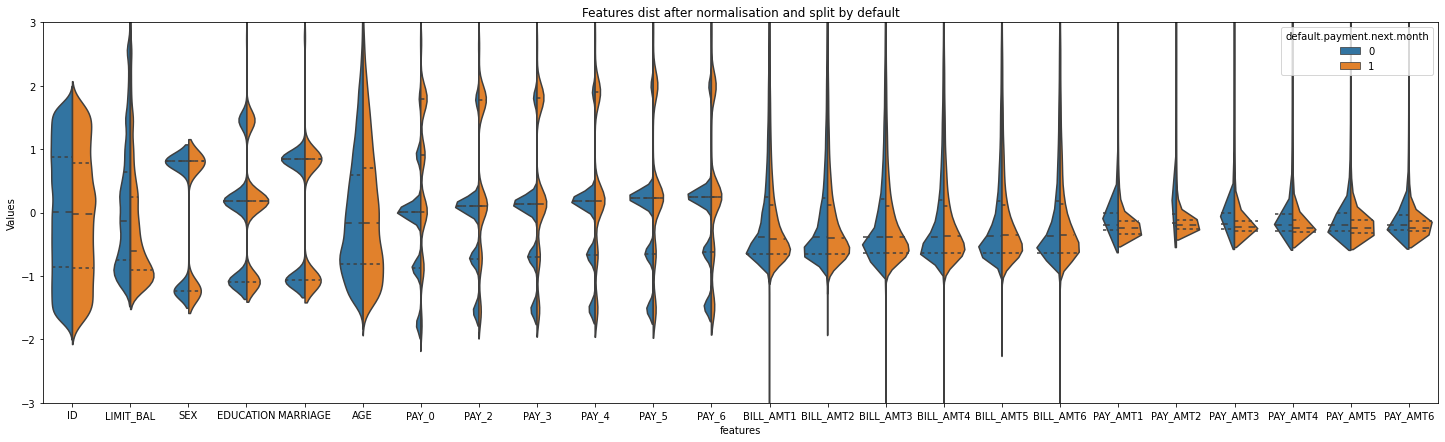

In [0]:
stdX = pd.concat([data[default], stdX], axis =1)

stdX = pd.melt(stdX, id_vars = default, var_name = "features", value_name = "Values" )
plt.figure(figsize = (25, 7))
sns.violinplot(x = "features", y = "Values", hue = default, data = stdX, split = True, inner = "quart")
plt.ylim([-3,3])
plt.title("Features dist after normalisation and split by default")


find a corelation between default


Text(0.5, 1.0, 'Correlation with features')

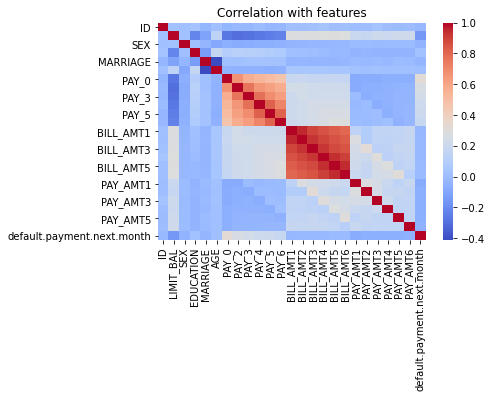

In [0]:
corr = data.corr()
sns.heatmap(corr, cmap = "coolwarm", fmt = ".f1")
plt.title("Correlation with features")

The heatmat shows that features are correlated with each other , such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. 

let's see corelation between 2 features

Text(0.5, 1.0, 'How corelate two features')

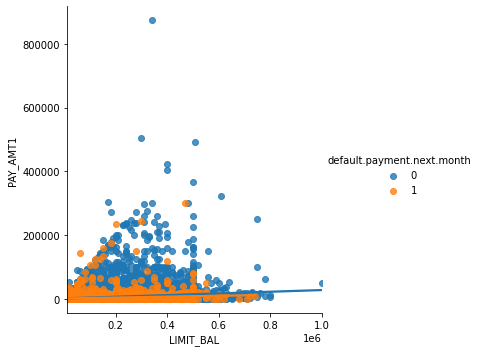

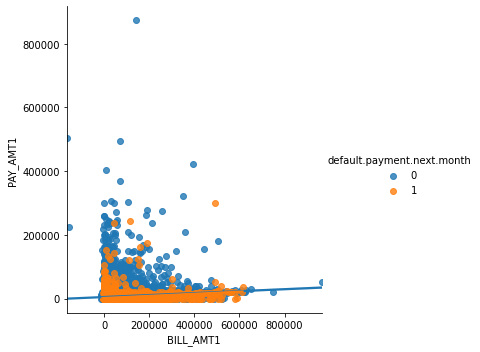

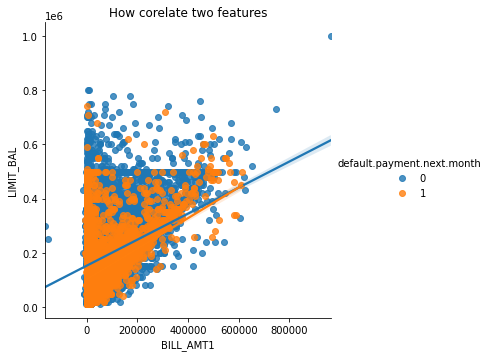

In [0]:


ax1 = sns.lmplot(x ="LIMIT_BAL", y = "PAY_AMT1", hue = default, data = data)
sns.lmplot(x ="BILL_AMT1", y = "PAY_AMT1", hue = default, data = data)
sns.lmplot(x = "BILL_AMT1", y = "LIMIT_BAL", hue = default, data =data)
plt.title("How corelate two features")


Can not find distinguish between linear regressions 
and I hz what it means


**Prediction (ML)**

Transform our dataset to features and target value. And split to train and tesst data set 70% to 30%

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop(default, axis =1)
y = data[default]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify =y, random_state =42)
stdX_train, stdX_test, y_train, y_test = train_test_split(stdX, y, test_size = 0.3, stratify =y, random_state =42)


Features selection. Use RFE algorithm


In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

num_f = 4
model =  LogisticRegression()
run_model = RFE(model, num_f)
run_model.fit(stdX, y)
print("Features  ranking:", run_model.ranking_)
score_m = run_model.score(stdX, y)
print("Features selected: %f"  % score_m.mean())
features_name = np.array(features.columns)
print("Most efficient columns: %s" % features_name[run_model.support_])

Features  ranking: [19  7 14  8  6  9  1  5  3 17 10 20  1  4  1 21 12 18  2  1 13 11 15 16]
Features selected: 0.812833
Most efficient columns: ['PAY_0' 'BILL_AMT1' 'BILL_AMT3' 'PAY_AMT2']


In [0]:
Xlim  = stdX[['PAY_0','BILL_AMT1','BILL_AMT3', 'PAY_AMT2']]
Xlim_tr, Xlim_t, y_tr, y_t = train_test_split(Xlim, y, test_size = 0.3, stratify = y, random_state=42)

Use Logistic regression for classification


In [0]:
from sklearn.model_selection import RandomizedSearchCV
C_param = {'C': np.logspace(0.5,5,10)}
logreg = LogisticRegression()
best_C = RandomizedSearchCV(logreg, C_param, cv=5, random_state = 0)
#best_C.fit(X_train, y_train)
C = 3.17 #model works very slowly, this is final result
#print("Tuned Logistic Regression Parameters: {}".format(best_C.best_params_)) 


Potentially Log regression doen't work well for such a complicated problem. So, C paramenter doen't play role in this case, thats way model for finding the best param C doen't work(Converge)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Sore 0.7787777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


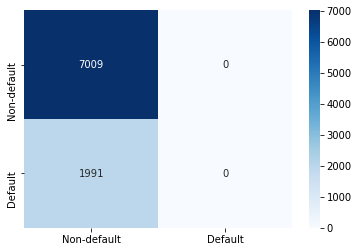

In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Sore {}".format(metrics.accuracy_score(y_pred, y_test)))

cros_val = cross_val_score(LogReg, X_train, y_train, cv=5)
print(metrics.classification_report(y_test, y_pred))

Confu_Matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(Confu_Matrix, annot= True, cmap = "Blues", fmt = "d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

As expected Logistic Rergression (LR) can't solve this problem. Actually LR recognised no Default at all. 

Not assuming that features may help, but want to know how perform the model with diff features.

Sore 0.8083333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



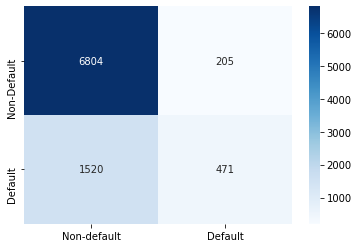

In [0]:
stXLog = LogisticRegression()
stX_model = stXLog.fit(stdX_train, y_train)
y_pred2 = stX_model.predict(stdX_test)
print("Sore {}".format(metrics.accuracy_score(y_test, y_pred2)))
cv_score2 = cross_val_score(stXLog, stdX_train, y_train)
print(metrics.classification_report(y_test, y_pred2))
Con_Matric2 = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(Con_Matric2, cmap = "Blues", annot = True, fmt ="d", xticklabels=['Non-default', 'Default'],
            yticklabels = ['Non-Default', 'Default'])

At leat this model can recognise Default cases. 

now try to apply the "best" features


Score 0.8122222222222222
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.27      0.39      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.62      0.64      9000
weighted avg       0.80      0.81      0.78      9000



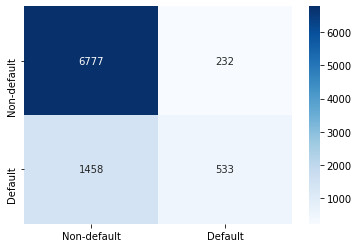

In [0]:
B_LogReg = LogisticRegression()
B_model = B_LogReg.fit(Xlim_tr, y_tr)
b_y_pred = B_model.predict(Xlim_t)

print("Score {}".format(metrics.accuracy_score(y_t, b_y_pred)))
print(metrics.classification_report(y_t, b_y_pred))

Con_matic3 = metrics.confusion_matrix(y_t, b_y_pred)
sns.heatmap(Con_matic3, cmap = "Blues", annot = True, fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])


Some of metrics became better but others became worse

Decision Tree algorithm


In [0]:
from sklearn.tree import DecisionTreeClassifier

param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ['gini', 'entropy']}
RanS = DecisionTreeClassifier()
Random_param = RandomizedSearchCV(RanS, param_dist)
Random_param.fit(X_train, y_train)
print("Best param {}".format(Random_param.best_params_))


Best param {'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 6, 'criterion': 'entropy'}


Use the best parameters for Decision Tree

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.32      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



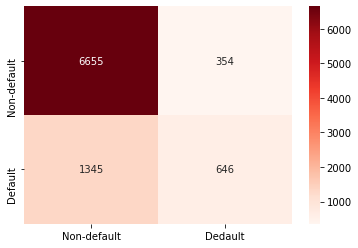

In [0]:
Dec_Tree = DecisionTreeClassifier(min_samples_leaf = 1, criterion = 'entropy',
                                  max_features = 8, max_depth = 6 )
model_DS = Dec_Tree.fit(X_train, y_train)
y_pred_DS = Dec_Tree.predict(X_test)
print(metrics.classification_report(y_test, y_pred_DS))

CM_DS = metrics.confusion_matrix(y_test, y_pred_DS)
sns.heatmap(CM_DS, cmap = "Reds", annot = True, fmt = "d",
            xticklabels = ['Non-default', 'Dedault'],
            yticklabels = ['Non-default', 'Default'])

Finaly Random forest, aaaw

In [0]:
from sklearn.ensemble import RandomForestClassifier
dist_param = { "n_estimators": [10,50, 70, 100, 110, 120],
              "max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "criterion": ['gini', 'entropy']}
df = RandomForestClassifier()
m_df = RandomizedSearchCV(df, dist_param)
m_df.fit(X_train, y_train)
print("best param {}".format(m_df.best_params_))


best param {'n_estimators': 100, 'max_features': 5, 'max_depth': 8, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



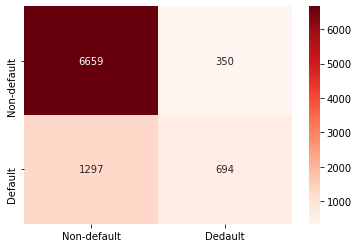

In [0]:
mod_rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, criterion='gini')
mod_rf.fit(X_train, y_train)
y_pred_rf = mod_rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_rf))
CM_RF=metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(CM_RF, cmap = "Reds", annot = True, fmt = "d",
            xticklabels = ['Non-default', 'Dedault'],
            yticklabels = ['Non-default', 'Default'])

Try NN for classification


In [0]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
Xnn = sts.fit_transform(features)
from keras.utils import to_categorical
ynn = to_categorical(y, num_classes=None, dtype='float32')
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(Xnn, ynn, random_state = 42, test_size = 0.3)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
#y = ohe.fit_transform(y).toarray()



In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import 

nn_model  = Sequential()
nn_model.add(Dense(15, input_dim = 24, activation = "relu"))
nn_model.add(Dense(10, activation = 'relu'))
nn_model.add(Dense(2, activation = 'sigmoid'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn_model.fit(Xnn_train, ynn_train, epochs=100, batch_size=64)
from sklearn.metrics import accuracy_score
#a = accuracy_score(pred,test)
#print('Accuracy is:', a*100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





21000/21000 [==============================] - 1s 55us/step - loss: 0.5062 - acc: 0.7908
Epoch 2/100
21000/21000 [==============================] - 0s 21us/step - loss: 0.4577 - acc: 0.8084
Epoch 3/100
21000/21000 [==============================] - 0s 19us/step - loss: 0.4458 - acc: 0.8124
Epoch 4/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4411 - acc: 0.8156
Epoch 5/100
21000/21000 [==============================] - 0s 19us/step - loss: 0.4381 - acc: 0.8176
Epoch 6/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4359 - acc: 0.8187
Epoch 7/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4338 - acc: 0.8198
Epoch 8/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4328 - acc: 0.8204
Epoch 9/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4320 - a

We can see that even the siple NN works much better than any classifier